In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Импорты

In [15]:
testDataSet = pd.read_csv("S02-hw-dataset.csv") # Загрузка датасета
print("Первые строки: \n\n", testDataSet.head(), "\n\n")
print("Информация о столбцах и типах: \n")
print(testDataSet.info(), "\n\n")
print("Базовые описательные статистики: \n\n", testDataSet.describe())

Первые строки: 

    user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296 


Информация о столбцах и типах: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None 


Базовые описательные статистики: 

          user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259 

In [26]:
print("Доля пропусков в каждом столбце:\n\n", testDataSet.isna().mean())

Доля пропусков в каждом столбце:

 user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [29]:
print("Наличие полностью дублирующих строк:\n\n", testDataSet.duplicated())

Наличие полностью дублирующих строк:

 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool


In [46]:
for i in testDataSet.values:  # Анализ
    if (i[1] > 100):
        print(i, "--- Подозрительно большой возраст")
    if (i[1] < 18):
        print(i, "--- Подозрительно маленький возраст")
    if ((i[-1] < 0) or (i[-2] < 0)):
        print(i, "--- Отрицательные значения в полях \'Покупки\' и \'Выручка\'")
    if ((i[-2] == 0) and (i[-1] > 0)):
        print(i, "--- Ненулевая выручка при нулевых покупках")
    if ((i[-1] == 0) and (i[-2] > 0)):
        print(i, "--- Нулевая выручка при ненулевых покупках")


# Выявленные проверки показывают, что в наборе данных присутствуют неадекватные записи со
# слишком большим или малым возрастом, с ошибками в подсчете выручки, а также с отрицательными
# значениями в полях, которые их не допускают

[6 120.0 'FR' -1 785] --- Подозрительно большой возраст
[6 120.0 'FR' -1 785] --- Отрицательные значения в полях 'Покупки' и 'Выручка'
[11 24.0 'US' 4 0] --- Нулевая выручка при ненулевых покупках
[21 5.0 'RU' 8 1488] --- Подозрительно маленький возраст


In [61]:
print("Сколько раз встречалась страна: \n\n", testDataSet.get("country").value_counts());  # Подсчет частот для категориальных переменных

Сколько раз встречалась страна: 

 country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [70]:
print("Средние значения каждого поля для каждой страны: \n\n", testDataSet.groupby("country").mean());

Средние значения каждого поля для каждой страны: 

            user_id        age  purchases      revenue
country                                              
CN       10.000000  24.000000   4.500000  1054.000000
DE       24.666667  34.600000   6.500000  1445.500000
FR       20.666667  46.250000   4.250000   675.916667
RU       18.076923  30.076923   4.769231   790.076923
US       22.375000  36.714286   4.625000   557.375000


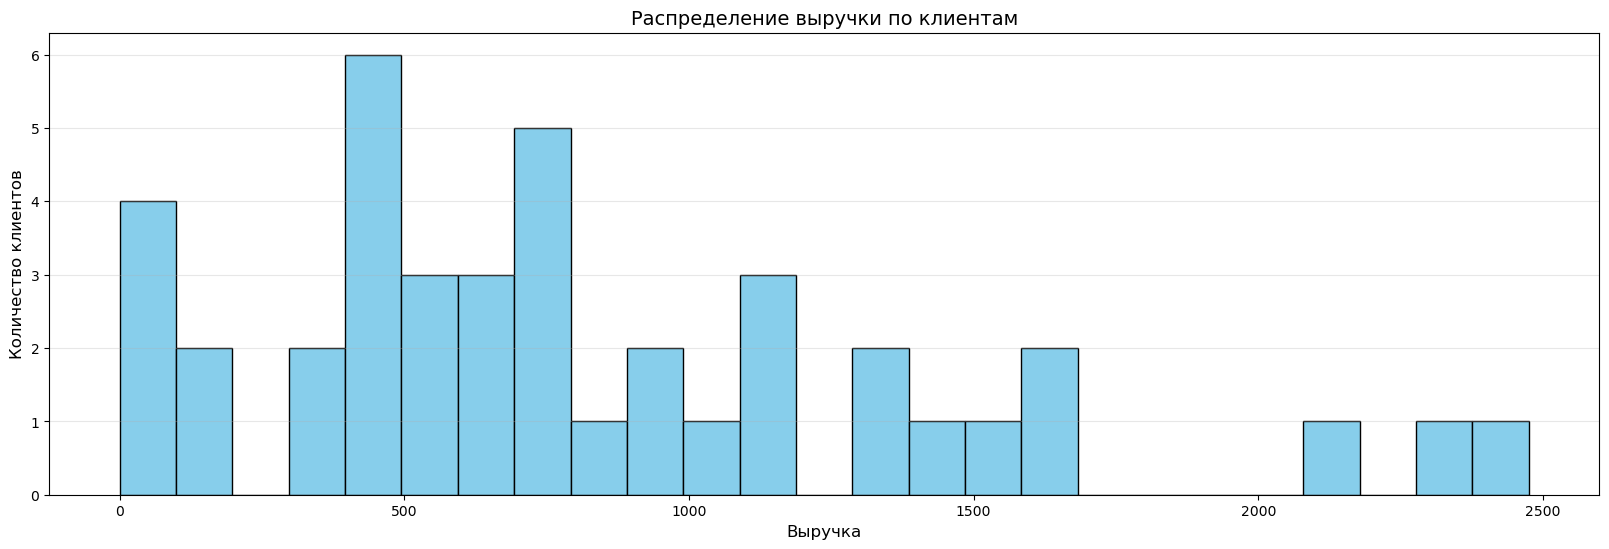

In [80]:
# Гистограмма
plt.figure(figsize=(20, 6))
plt.hist(testDataSet['revenue'], bins=25, color='skyblue', edgecolor='black')
plt.title('Распределение выручки по клиентам', fontsize=14)
plt.xlabel('Выручка', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.grid(axis='y', alpha=0.3)


plt.savefig('figures\\revenue_histogram.png', bbox_inches='tight')
plt.show()

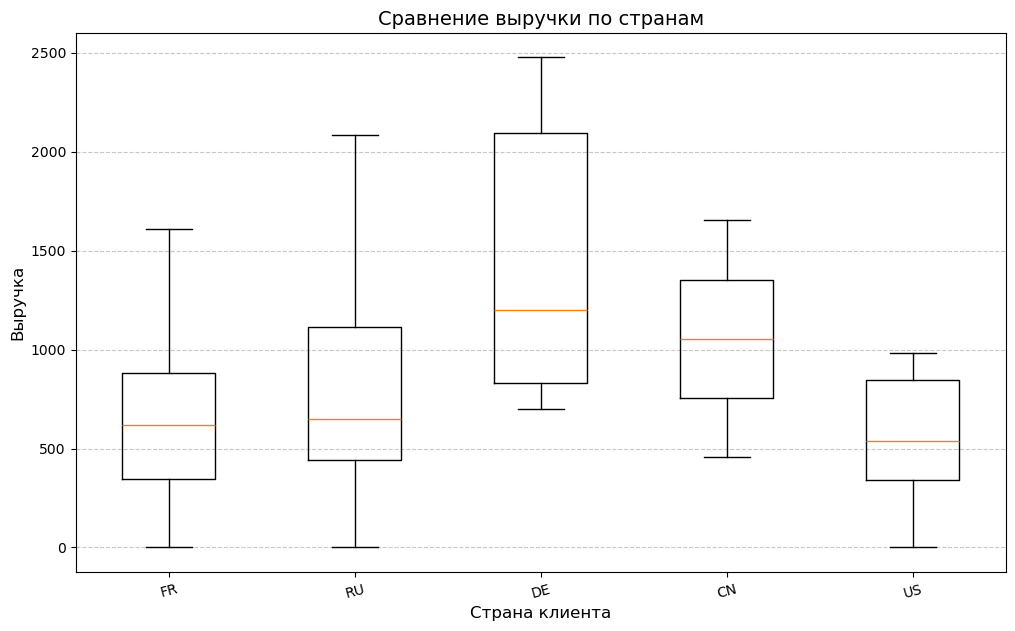

In [84]:
# Боксплот 
plt.figure(figsize=(12, 7))
countrys = testDataSet['country'].unique()
countrys_data = [testDataSet[testDataSet['country'] == cur]['revenue'] for cur in countrys]

plt.boxplot(countrys_data, tick_labels=countrys)
plt.title('Сравнение выручки по странам', fontsize=14)
plt.xlabel('Страна клиента', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('figures\\revenue_boxplot_by_country.png', bbox_inches='tight')
plt.show()

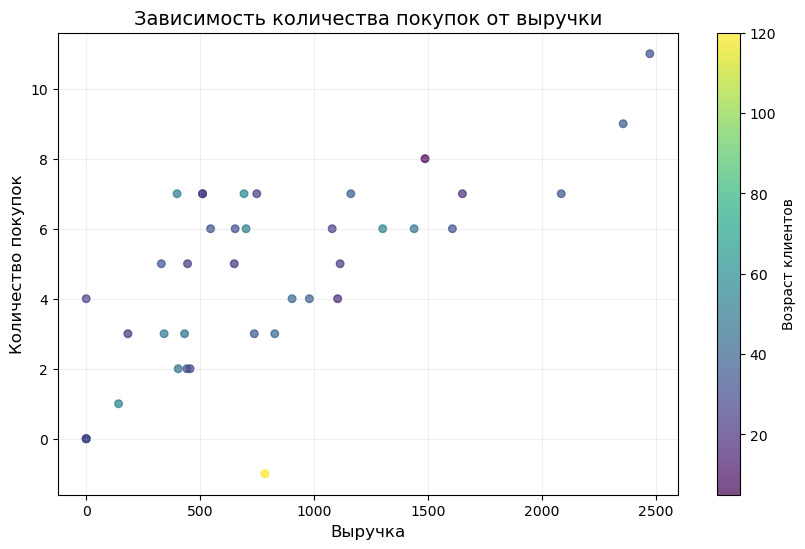

In [85]:
# Scatter plot 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    testDataSet['revenue'], 
    testDataSet['purchases'],
    c=testDataSet['age'],  # Цвет точек по возрасту
    cmap='viridis',
    alpha=0.7,
    s=30
)

plt.title('Зависимость количества покупок от выручки', fontsize=14)
plt.xlabel('Выручка', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.colorbar(scatter, label='Возраст клиентов')
plt.grid(alpha=0.2)
plt.savefig('figures\\purchase_by_revenue_scatter.png', bbox_inches='tight')
plt.show()